### Loading Required Packages

In [1]:
# loading the required libraries
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Loading and Exploring the Dataset

In [2]:
# loading the dataset in Pandas DataFrame
df = pd.read_csv('Restaurants_clean.csv')
# first 5 rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9550 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9550 non-null   int64  
 3   City                  9550 non-null   object 
 4   Address               9550 non-null   object 
 5   Locality              9550 non-null   object 
 6   Locality Verbose      9550 non-null   object 
 7   Longitude             9550 non-null   float64
 8   Latitude              9550 non-null   float64
 9   Cuisines              9550 non-null   object 
 10  Average Cost for two  9550 non-null   int64  
 11  Currency              9550 non-null   object 
 12  Has Table booking     9550 non-null   object 
 13  Has Online delivery   9550 non-null   object 
 14  Is delivering now     9550 non-null   object 
 15  Switch to order menu 

In [4]:
# analyzing the number of rows and columns
df.shape

(9550, 21)

In [5]:
# data types of columns present
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
# checking for null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Data Visualization

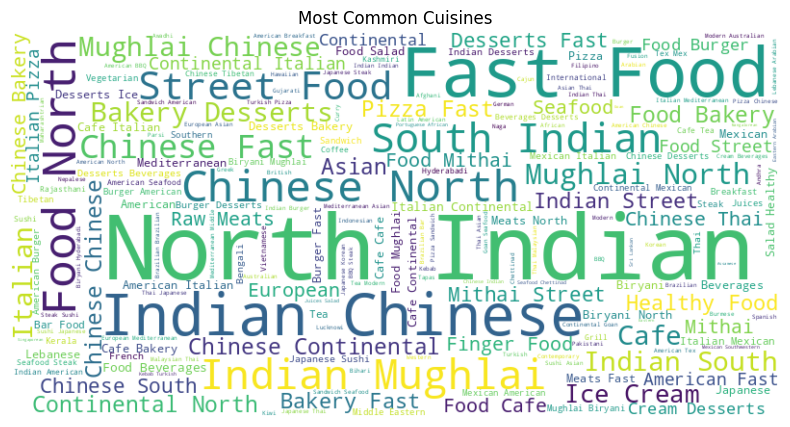

In [7]:
# combining all cuisines into a single text
text = ' '.join(df['Cuisines'])

# generating and plotting word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Cuisines")
plt.show()

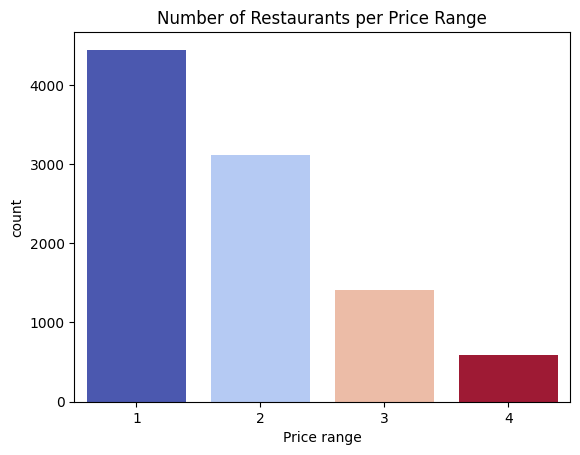

In [8]:
# count of restaurant per price range
sns.countplot(x='Price range', data=df, hue='Price range', palette='coolwarm', legend=False)
plt.title("Number of Restaurants per Price Range")
plt.show()

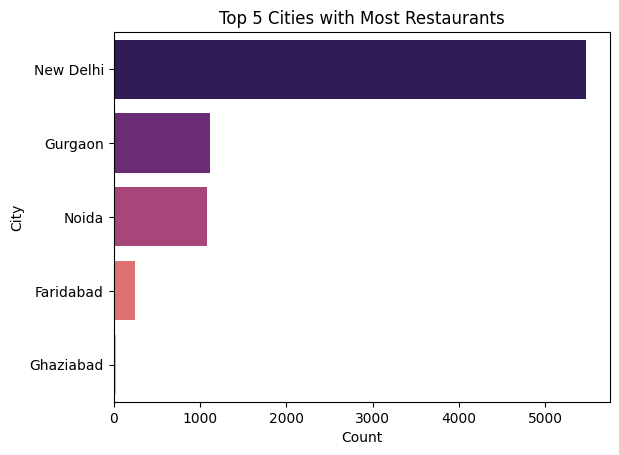

In [9]:
# top cities by restaurant count
top_cities = df['City'].value_counts().head(5)
df_top_cities = top_cities.reset_index()
df_top_cities.columns = ['City', 'Count']

sns.barplot(x='Count', y='City', data=df_top_cities, hue='City', palette='magma', legend=False)
plt.title("Top 5 Cities with Most Restaurants")
plt.show()

### Building Recommendation System

#### Relevant Features

In [10]:
# features relevant for building recommendation system
recc_df = df[['Restaurant Name', 'Locality', 'Cuisines', 'City', 'Price range']]
# combining features into a single column
recc_df.loc[:, 'Rest_metadata'] = recc_df['Cuisines'] + " " + recc_df['City'] + " Price Range:" + recc_df['Price range'].astype(str)
recc_df.head(5)

C:\Users\USER\AppData\Local\Temp\ipykernel_14508\3153305812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recc_df.loc[:, 'Rest_metadata'] = recc_df['Cuisines'] + " " + recc_df['City'] + " Price Range:" + recc_df['Price range'].astype(str)


,Restaurant Name,Locality,Cuisines,City,Price range,Rest_metadata
0,Le Petit Souffle,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",Makati City,3,"French, Japanese, Desserts Makati City Price R..."
1,Izakaya Kikufuji,"Little Tokyo, Legaspi Village, Makati City",Japanese,Makati City,3,Japanese Makati City Price Range:3
2,Heat - Edsa Shangri-La,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",Mandaluyong City,4,"Seafood, Asian, Filipino, Indian Mandaluyong C..."
3,Ooma,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",Mandaluyong City,4,"Japanese, Sushi Mandaluyong City Price Range:4"
4,Sambo Kojin,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",Mandaluyong City,4,"Japanese, Korean Mandaluyong City Price Range:4"


#### Feature Extraction: Text Vectorization

In [11]:
# initializing TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
# converting text data into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(recc_df['Rest_metadata'])
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of TF-IDF Matrix: (9550, 313)


#### Computing Cosine Similarity

In [12]:
# computing similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("Shape of Cosine Similarity Matrix:", cosine_sim.shape)

Shape of Cosine Similarity Matrix: (9550, 9550)


#### User-Defined Function

In [13]:
# user defined function that takes user preferences and recommends similar restaurants 
def recommend_restaurants(user_input, df, cosine_sim, top_n=5):
    """
    returns the top-N recommended restaurants based on user input.
    """
    # converting user input into a vector
    user_input_vector = vectorizer.transform([user_input])
    # computing similarity between user input and restaurants
    similarity_scores = cosine_similarity(user_input_vector, tfidf_matrix)
    # extracting top restaurant indices
    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    # recommendation df
    recommendations = recc_df.iloc[top_indices][['Restaurant Name', 'Cuisines', 'Locality', 'City', 'Price range']]
    recommendations = recommendations.sort_values(by='Price range', ascending=True)
    recommendations.index = range(1, len(recommendations) + 1)

    return recommendations

#### Testing the Recommendation System

#### 1. Budget-friendly North Indian restaurants in New Delhi

In [14]:
# budget-friendly north indian restaurants in New Delhi
user_pref = "North Indian New Delhi Price Range:1"
recommendations = recommend_restaurants(user_pref, df, cosine_sim)
recommendations

,Restaurant Name,Cuisines,Locality,City,Price range
1,Soni Bhojnalaya,North Indian,Chandni Chowk,New Delhi,1
2,Takkar Dhaba,North Indian,Kalkaji,New Delhi,1
3,Punjabi Corner,North Indian,Kalkaji,New Delhi,1
4,Chicken Addiction,North Indian,Rajouri Garden,New Delhi,2
5,Garage,North Indian,Rajouri Garden,New Delhi,2


#### 2. Mid-priced Cafes in Faridabad

In [15]:
# mid-priced cafes in Faridabad
user_pref = "Cafe Faridabad Price Range:2"
recommendations = recommend_restaurants(user_pref, df, cosine_sim)
recommendations

,Restaurant Name,Cuisines,Locality,City,Price range
1,The Chaiwalas,Cafe,Badkal Lake,Faridabad,1
2,Cafe Coffee Day,Cafe,Sector 15,Faridabad,1
3,Cafe Bite,Cafe,"Parsavnath City Mall, Sector 12, Faridabad",Faridabad,2
4,The Binge Box Cafe,Cafe,Sector 17,Faridabad,2
5,Tmos Cafe Corner,Cafe,Sector 17,Faridabad,2


#### 3. Mid-priced Pizzerias in Gurgaon

In [16]:
# budget-friendly pizzerias in Gurgaon
user_pref = "Pizza Gurgaon Price Range:2"
recommendations = recommend_restaurants(user_pref, df, cosine_sim)
recommendations

,Restaurant Name,Cuisines,Locality,City,Price range
1,Konetto Pizza,Pizza,Sector 14,Gurgaon,1
2,Konetto Pizza,Pizza,Sector 21,Gurgaon,1
3,Chicago Pizza,Pizza,"MGF Metropolitan Mall, MG Road",Gurgaon,2
4,Domino's Pizza,"Pizza, Fast Food",DLF Cyber City,Gurgaon,2
5,Domino's Pizza,"Pizza, Fast Food",Udyog Vihar,Gurgaon,2


#### 4. Higher-end Japanese Restaurants in New Delhi

In [17]:
# budget-friendly pizzerias in Gurgaon
user_pref = "Japanese New Delhi Price Range:4"
recommendations = recommend_restaurants(user_pref, df, cosine_sim)
recommendations

,Restaurant Name,Cuisines,Locality,City,Price range
1,Dimsum Vs Sushi,"Japanese, Chinese",Punjabi Bagh,New Delhi,2
2,Tamura,Japanese,Green Park,New Delhi,3
3,Manami Japanese Restaurant,Japanese,MG Road,New Delhi,3
4,Tamura,Japanese,Jasola,New Delhi,3
5,Fuji Japanese Restaurant,Japanese,Connaught Place,New Delhi,4
